# Day 8 In-class Assignment: Visualizing population growth

### <p style="text-align: right;"> &#9989; Put your name here.
<p style="text-align: right;"> &#9989; Put your group member names here.

We've already spent a bit of time in this course thinking about the growth of money when you put it into a savings account. Now we’re going to be thinking about another kind of growth: **population growth.** 

In this assignment you're going to work to **visualize growth of the human population.** This should give you a good foundation for modeling some of our future projects!

<div align="center"><img src="https://futuresplanning.files.wordpress.com/2010/07/populationgrowthhistory2.jpg" width=600px></div>


## Learning Goals:

By the end of this assignment you should be able to:

* Use the numpy module in Python to compute values that can be used in computational models for real-world phenomena.
* Use matplotlib to visualize your models.
* Customize matplotlib plots to maximize the information they provide.

---
## Part 1: Modeling and visualizing population growth

We're going to model another evolving system -- the human population. One possible model for population growth is called a *logistic model*. For this model, the growth of the population ($P$) as a function of time, $t$, can be modeled using the following equation:

$$P(t) = \frac{K}{1+Ae^{-k_R(t-t_0)}}$$

where $K$ represents the *carrying capacity* of the population, which is the maximum population that the environment can sustain, and $k_R$ is the relative growth rate coefficient (in units of 1/time). $A$ is defined as:

$$A = \frac{K-P_{0}}{P_{0}}$$

where $P_{0}$ is the initial value of the population at $t=t_0$.

Remember that the exponential, $e$, can be computed using the numpy module, `np.exp()`.

### 1.1 Plan out your code: Calculating Total Population

&#9989;&nbsp; **As a group**, design a function called `calc_population`. 
It should take: 
- An initial population, $P_{0}$
- A carrying capacity, $K$
- A relative growth rate, $k_R$
- A **list** of times in years
- An initial time $t_0$

It should return a **a list of the corresponding population values** for each time in the list that was passed. 

You and your groups members are expected to work this out **together using a whiteboard** (either a physical or virtual one (e.g. [Google Jamboard](https://jamboard.google.com/))).

*Things to think about:*
- how will you convert the math from the equations above into code?
- How will you calculate the population for every time value in the list that was passed?
- How will you return the population values?

<font size="+3">&#9998;</font> *Write your plan here*

### 1.2 Translate your plan into code: Calculating Populations

&#9989;&nbsp; Translate your plan from the previous problem into a function that calculates the total population for a given set of initial inputs.

**Work with your group to figure this out!**

In [2]:
# Put your code here
import matplotlib.pyplot as plt    
import numpy as np

yearlist = list(range(1800,2100))

def calc_population (P,K,G,years_list,init_time):
    pop=[]
    A = (K-P)/P 
    e = np.e
    for i in range(len(years_list)):
        Y = (years_list[i]-years_list[0])
        oh = ( (K)/  (1+A*  (e**(-G*Y)) )  )   
        pop.append(oh)
    return pop

pop_y = calc_population(10**9,12*(10**9),.01,yearlist,yearlist[0])

### 1.3 Testing your code: Calculating Populations

&#9989;&nbsp; Test out your code to see if it is working. Use the following values for your model:
- Assume the carrying capacity, $K$, is 12 billion 
- The initial population, $P_0$, is 1 billion, 
- The starting time is 1800 and the end time is 2100 (assume a time step size of 1 year)
- The relative population growth, $k_R$, is 0.01 per year.

**Model the population growth for these inputs and make a plot showing the results.**

**Work with your group to figure this out!**

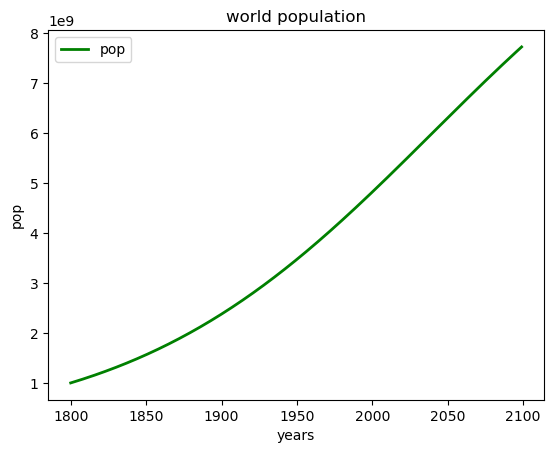

In [3]:
# The following line creates your initial time list (technically, it is creating a numpy array, but we won't worry about that for now)
t_list = np.arange(1800,2100,1) # make an array of year values

# Put your code here


plt.plot(t_list,pop_y,color='green',label=('pop'),linewidth=2)

plt.title('world population')
plt.ylabel('pop')
plt.xlabel('years')
plt.legend()



### 1.4 Varying the Parameters: Calculating Populations

Let's see how the different parameters effect our growth model. 

&#9989;&nbsp; Calculate the population growth for all of the same input values as 1.1.3 except use a relative population growth values of:

$k_R =$ 0.01, 0.015, 0.02, 0.03, 0.04, and 0.05

Put the lines for **all six** growth models on the **same plot**. Use `plt.legend()` to add a legend to the plot so that you know which line is which. You'll want to use the `label` parameter in your plot command to make sure the legend has the appropriate labels for the lines.

**Make sure to add appropriate axis labels and a plot title.**

**Work with your group to figure this out!**

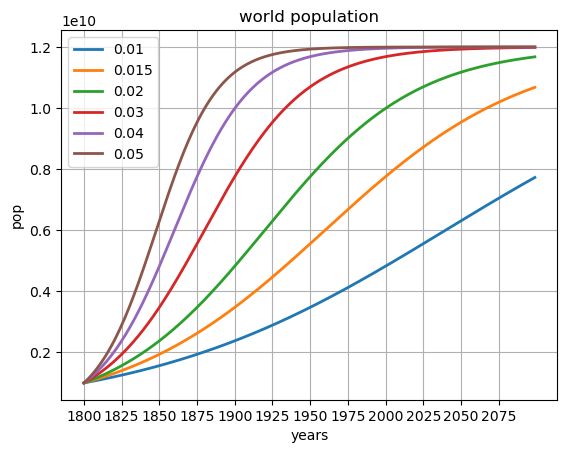

In [4]:
# The following line creates your initial time list (technically, it is creating a numpy array, but we won't worry about that for now)

t_list = np.arange(1800,2100,1) # make an array of year values


# Put your code here
kR=[0.01,0.015,0.02,0.03,0.04,0.05]
ylists =[]

for ii in range(len(kR)):
    poppy = calc_population(10**9,12*(10**9),kR[ii],yearlist,yearlist[0])
    ylists.append(poppy)


tickies=[]
tick=25
for i in range(round(len(yearlist)/tick)):
    tickies.append (yearlist[i*tick])
    
for i in range(len(ylists)):
    plt.plot(t_list,ylists[i],label=(kR[i]),linewidth=2)

plt.title('world population')
plt.ylabel('pop')
plt.xlabel('years')
plt.legend()
plt.xticks(tickies)
plt.grid()

&#9989;&nbsp; **Question**: Do the population models behave as you would expect? Specifically, for the larger values of $k_R$, does it approach, but not exceed the carrying capacity, $K$?

<font size="+3">&#9998;</font> *Yes they behave as expected.  The numbers hit the carrying capacity and cannot exceed it*

&#9989;&nbsp; **Question**: If the human population was roughly 7 billion in 2012, what would be the value of $k_R$ that would most closely match that population at that time given the current parameters of the model?
>**Hint**: Try adding a `plt.grid()` after your plot commands to add a grid to the plot. This can be helpful for seeing where a specific point is.

<font size="+3">&#9998;</font> *It would be between .01 and .015 rates. *

### 1.5 Plot modifications

&#9989;&nbsp; The above plot looks very nice (colors!), however, some people might not be able to distinguish between different colors (color blindness). A way to make your plot readable for everyone is to use a different linestyle for each model. In the next code cells explore ways in which you can modify your plot

1. **Linestyles:** Instead of plotting each model as a line, use a different linestyle for each model. Here is the [link](https://matplotlib.org/stable/gallery/lines_bars_and_markers/linestyles.html) list of linestyles available in `matplotlib`.
2. **Markers:** You could also plot each point with a different marker. Here is the [link](https://matplotlib.org/stable/api/markers_api.html) to a list of markers available in `matplotlib`. **Make a new plot** using different markers for different models, but remove the lines between the markers.
3. **All together now:** What happens when you add linestyles and markers in your plotting? Try it. **Make a new plot** using combinations of markers and linestyles for different models.
4. **Legend:** Explore the input parameters of the function `plt.legend()`. Can you change the location of the legend? Can you change the number of columns in the legend?
5. **Grid lines:** The grid lines in the above plot are a little to overwhemlming. Try changing the parameter `alpha` in the function `plt.grid()` to see what happens.
6. **Axes:** Rescale the $x$ and $y$ range of the plot so that you only see the first 25 years of values on the $x$-axis and a population range of 0.5 billion to 3 billion on the $y$-axis. **Hint**: you'll want to use the `xlim` and `ylim` functions in `pyplot`.
7. **Title:** Put a title on each plot. 

**DON'T FORGET THE AXES LABELS!**

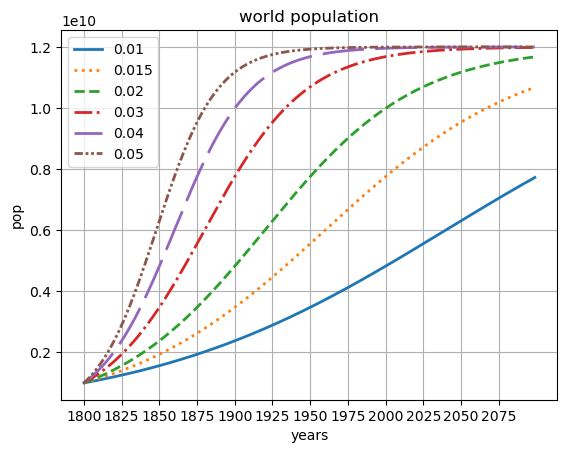

In [5]:
# The following line creates your initial time list (technically, it is creating a numpy array, but we won't worry about that for now)
t_list = np.arange(1800,2100,1) # make an array of year values
linetype = ['solid','dotted','dashed','dashdot',(0, (15, 4, 15, 4)),(0, (3, 1, 1, 1, 1, 1))]

# Put your code here
for i in range(len(ylists)):
    plt.plot(t_list,ylists[i],label=(kR[i]),linestyle=linetype[i],linewidth=2)

plt.title('world population')
plt.ylabel('pop')
plt.xlabel('years')
plt.legend()
plt.xticks(tickies)
plt.grid()

### A SHORT DETOUR: Putting multiple plots in the same figure using `subplot()`

`matplotlib` comes with a handy way to put mutiple plots in the same figure. A function that does this is called `subplot` and is part of the `pyplot` module. The command for making a `subplot` figure is something like this:

`plt.subplot(3,2,1)`

The above command creates and returns a set of `axes` for a figure with 6 plots in it arranged in 3 rows and 2 columns.  The `1` at then end of the inputs is the index for which axes you are going to fill in next.  For example:

`plt.subplot(3,2,1)`<br>
`plt.plot(xA, yA)`

will plot the values in `(xA, yA)` in the first sub plot. And, 

`plt.subplot(3,2,2)`<br>
`plt.plot(xB, yB)`

will plot the values in `(xB, yB)` in the second sub plot of this figure.

The following bit of code provides an example of how the `subplot` function can be used. **Make sure you read and understand what the code is doing!**

You may also find this page of `subplot` examples useful: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplot.html

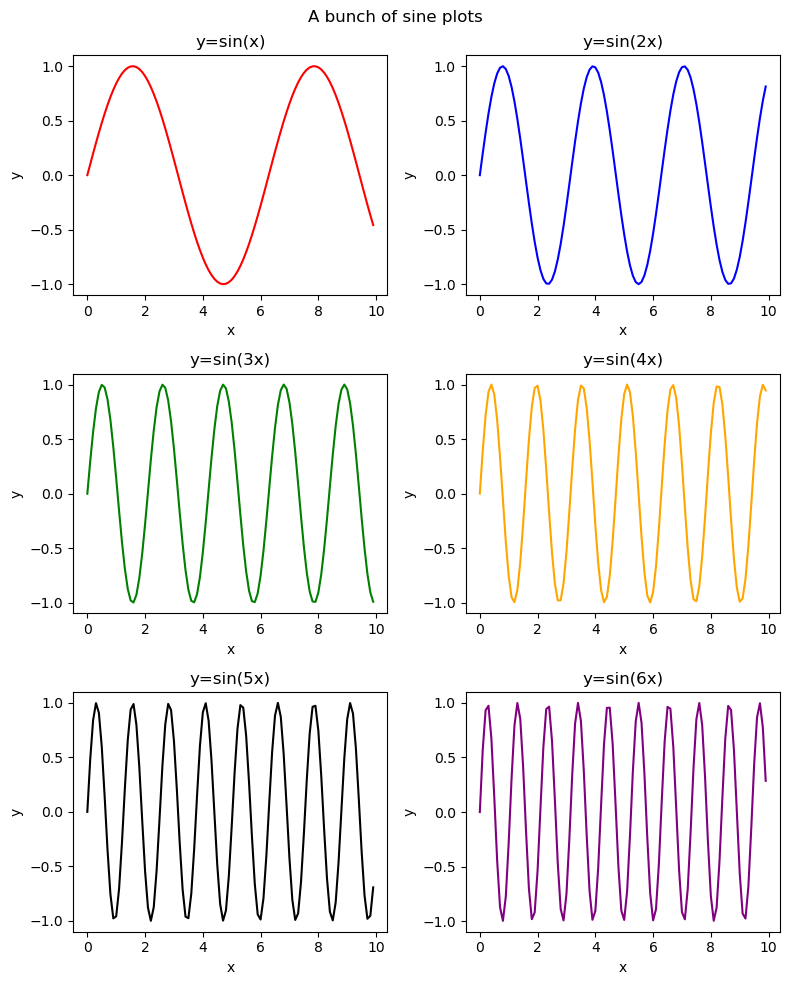

In [9]:
# initialize lists
x_list = []
y1 = []
y2 = []
y3 = []
y4 = []
y5 = []
y6 = []

# fill lists with values
for i in range(100):
    x = i*0.1
    x_list.append(x)
    y1.append(np.sin(x))
    y2.append(np.sin(2*x))
    y3.append(np.sin(3*x))
    y4.append(np.sin(4*x))
    y5.append(np.sin(5*x))
    y6.append(np.sin(6*x))

# makes a single figure that is 8 in wide and 10 in tall
plt.figure(figsize=(8,10))
plt.suptitle('A bunch of sine plots')  # title for the whole figure


# plot each curve on a separate subplot
plt.subplot(3,2,1) # Generate the 1st subplot of a 3x2 set of plots
plt.plot(x_list, y1, color='red') # plot points in the first subplot
plt.xlabel('x')
plt.ylabel('y')
plt.title('y=sin(x)')  # title for 1st subplot

plt.subplot(3,2,2) # Generate the 2nd subplot of a 3x2 set of plots
plt.plot(x_list, y2, color='blue') # plot points in the second subplot
plt.xlabel('x')
plt.ylabel('y')
plt.title('y=sin(2x)')

plt.subplot(3,2,3) # Generate the 3rd subplot of a 3x2 set of plots
plt.plot(x_list, y3, color='green') # plot points in the third subplot
plt.xlabel('x')
plt.ylabel('y')
plt.title('y=sin(3x)')

plt.subplot(3,2,4) # Generate the 4th subplot of a 3x2 set of plots
plt.plot(x_list, y4, color='orange') # plot points in the fourth subplot
plt.xlabel('x')
plt.ylabel('y')
plt.title('y=sin(4x)')

plt.subplot(3,2,5) # Generate the 5th subplot of a 3x2 set of plots
plt.plot(x_list, y5, color='black') # plot points in the fifth subplot
plt.xlabel('x')
plt.ylabel('y')
plt.title('y=sin(5x)')

plt.subplot(3,2,6) # Generate the 6th subplot of a 3x2 set of plots
plt.plot(x_list, y6, color='purple') # plot points in the sixth subplot
plt.xlabel('x')
plt.ylabel('y')
plt.title('y=sin(6x)')

plt.tight_layout()

Notice how each of the above six plots are made. The order of the plotting matters here.  There are also other functions in `matplotlib` for achieving the same result.

&#9989;&nbsp; **Question**: What does the last command, `plt.tight_layout()` in the example code do? Try commenting it out to see how it changes things.

<font size="+3">&#9998;</font> *Put your answer here*

---
## Assignment wrapup

Please fill out the form that appears when you run the code below. **You must completely fill this out in order to receive credit for the assignment!** 

In [10]:
from IPython.display import HTML
HTML(
"""
<iframe 
	src="https://cmse.msu.edu/cmse201-ic-survey" 
	width="800px" 
	height="600px" 
	frameborder="0" 
	marginheight="0" 
	marginwidth="0">
	Loading...
</iframe>
"""
)

---

## Congratulations, you're done!

Submit this assignment by uploading it to the course Desire2Learn web page.  Go to the "In-class assignments" folder, find the appropriate submission folder link, and upload it there.

See you next class!

&#169; Copyright 2023,  The Department of Computational Mathematics, Science and Engineering at Michigan State University